In [7]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
factory = PokemonFactory()
ball_types = [ "pokeball", "ultraball", "fastball", "heavyball" ]

In [3]:
pokes = factory.create_all(level=100)

In [5]:
avg_per_poke = {}
for ball in ball_types:
    avg_per_poke[ball] = {}
    for poke in pokes:
        count = 0
        tot = 0
        for i in range(1, 1000):
            count += 1
            was_captured, capture_rate = attempt_catch(poke, ball)
            tot += was_captured
        avg_per_poke[ball][poke.name] = tot/count

avg_per_poke

{'pokeball': {'jolteon': 0.05305305305305305,
  'caterpie': 0.36536536536536535,
  'snorlax': 0.028028028028028028,
  'onix': 0.05405405405405406,
  'mewtwo': 0.004004004004004004},
 'ultraball': {'jolteon': 0.11711711711711711,
  'caterpie': 0.6626626626626627,
  'snorlax': 0.07007007007007007,
  'onix': 0.12312312312312312,
  'mewtwo': 0.01001001001001001},
 'fastball': {'jolteon': 0.25225225225225223,
  'caterpie': 0.3213213213213213,
  'snorlax': 0.025025025025025027,
  'onix': 0.06106106106106106,
  'mewtwo': 0.01701701701701702},
 'heavyball': {'jolteon': 0.043043043043043044,
  'caterpie': 0.28128128128128127,
  'snorlax': 0.0920920920920921,
  'onix': 0.09309309309309309,
  'mewtwo': 0.001001001001001001}}

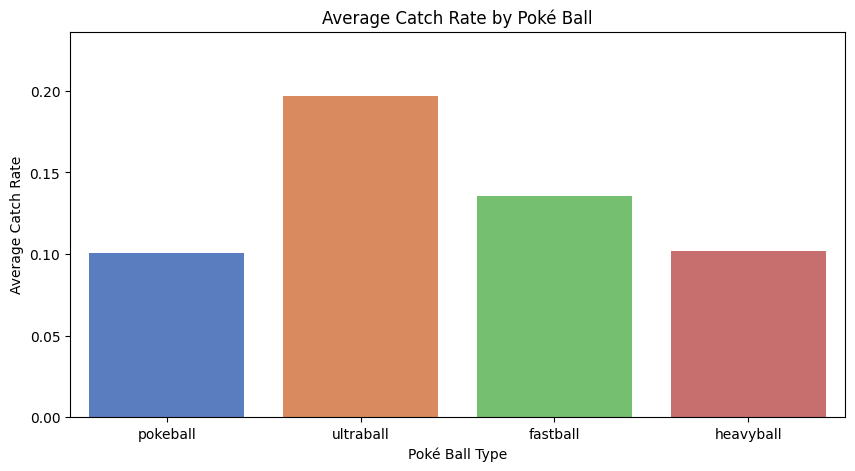

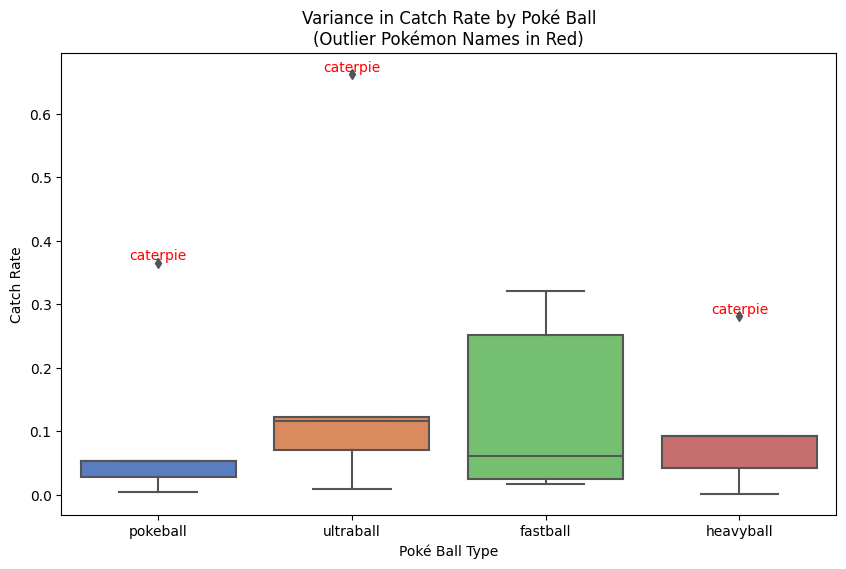

In [8]:
poke_names = []
catch_rates = []
ball_labels = []

for ball, pokes in avg_per_poke.items():
    for poke, rate in pokes.items():
        poke_names.append(poke)
        catch_rates.append(rate)
        ball_labels.append(ball)

# Create a DataFrame for Seaborn
df = pd.DataFrame({'Poké Ball': ball_labels, 'Catch Rate': catch_rates, 'Pokémon': poke_names})

# Calculate averages per ball
avg_rates = {ball: np.mean(list(avg_per_poke[ball].values())) for ball in ball_types}

# --- PLOT 1: Bar Chart (Average Catch Rate per Poké Ball) ---
plt.figure(figsize=(10, 5))
sns.barplot(x=list(avg_rates.keys()), y=list(avg_rates.values()), palette="muted")
plt.xlabel("Poké Ball Type")
plt.ylabel("Average Catch Rate")
plt.title("Average Catch Rate by Poké Ball")
plt.ylim(0, max(avg_rates.values()) * 1.2)  # Add some padding
plt.show()

# --- PLOT 2: Box Plot (Variance in Catch Rate) ---
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Poké Ball", y="Catch Rate", data=df, palette="muted")

# Identify Outliers
for ball in ball_types:
    ball_data = df[df['Poké Ball'] == ball]['Catch Rate']
    q1 = np.percentile(ball_data, 25)
    q3 = np.percentile(ball_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df['Poké Ball'] == ball) & ((df['Catch Rate'] < lower_bound) | (df['Catch Rate'] > upper_bound))]

    for _, row in outliers.iterrows():
        plt.text(ball_types.index(ball), row['Catch Rate'], row['Pokémon'], 
                 horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='red')

# Titles and Labels
plt.xlabel("Poké Ball Type")
plt.ylabel("Catch Rate")
plt.title("Variance in Catch Rate by Poké Ball\n(Outlier Pokémon Names in Red)")
plt.show()

### ej_1b

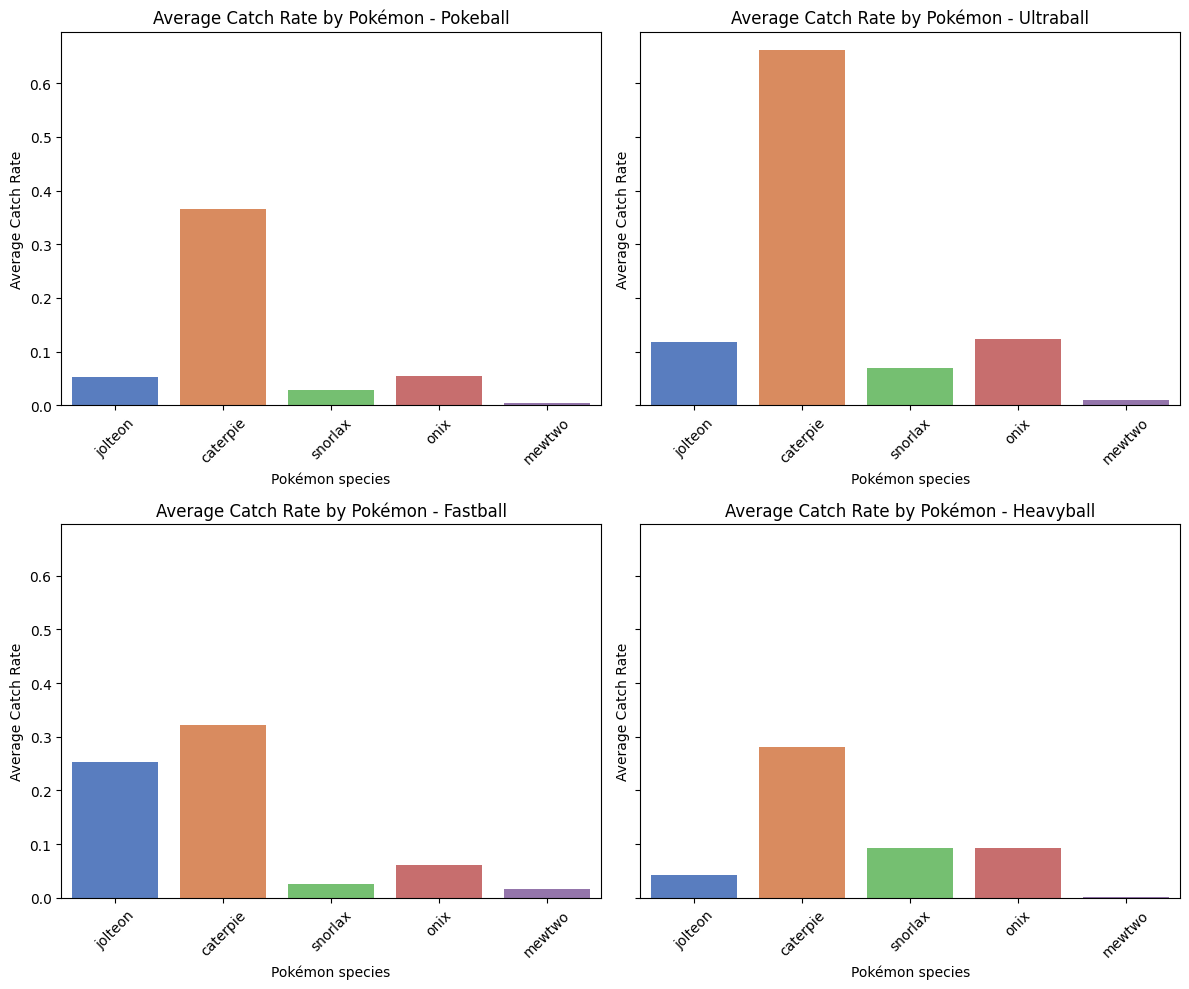

In [56]:
# sharey=True makes them all have the same scale
# the axes are each of the subfigures
_, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

for ax, (ball, pokemon) in zip(axes.flat, avg_per_poke.items()):
    sns.barplot(x=list(pokemon.keys()), y=list(pokemon.values()), palette="muted", ax=ax)    
    ax.set_xlabel("Pokémon species")
    ax.set_ylabel("Average Catch Rate")
    ax.set_title(f"Average Catch Rate by Pokémon - {ball.capitalize()}")
    ax.set_xticklabels(pokemon.keys(), rotation=45, ha="center")
plt.tight_layout()
plt.show()